# TechLab - Trading Algoritmico Pt.4.1

In [1]:
%matplotlib notebook
import bs4 as bs
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import os
import pandas as pd
import pandas_datareader.data as web
import pickle
import requests

style.use('ggplot')

Definisco funzione per download ticker S&P500 da Wikipedia e download prezzi da Yahoo

In [2]:
def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find('table', {'class':'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:136]:
        ticker = row.findAll('td')[0].text
        ticker = ticker.replace('/n','').strip()
        ticker = ticker.replace('.','-').strip()
        tickers.append(ticker)
    
    with open("Data/sp500tickers.pickle","wb") as f:
        pickle.dump(tickers, f)
    
    print(tickers)
    
    return tickers

def get_data_from_yahoo(reload_sp500=True, start = dt.datetime(2000,1,1), end = dt.datetime(2018,1,1), path = 'Data/stock_dfs'):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("Data/sp500tickers.pickle","rb") as f:
            tickers = pickle.load(f)
    
    if not os.path.exists(path):
        os.makedirs(path)
    
    for ticker in tickers:
        print(ticker)
        if not os.path.exists(path+'/{}.csv'.format(ticker)):
            df = web.DataReader(ticker, 'yahoo', start, end)
            df.to_csv(path+'/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))

Se online scarico su un pickle l'elenco dei ticker aggiornato e i prezzi da Yahoo

In [3]:
#get_data_from_yahoo(start = dt.datetime(2000,1,1), end = dt.datetime(2018,1,1), path = 'Data/stock_dfs')
#get_data_from_yahoo(start = dt.datetime(2018,1,2), end = dt.datetime(2019,7,16), path = 'Data/stock_dfs_new')

Se offline carico i dati che sono stati pre-scaricati

In [4]:
with open("Data/sp500tickers.pickle","rb") as f:
    tickers = pickle.load(f)
print(tickers[1:136])

['ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'ANET', 'AJG', 'AIZ', 'ATO', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK-B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF-B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CBS', 'CDW', 'CE', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT']


Creo un'unica tabella con i prezzi (Adj Close) di tutti i titoli: nelle righe il tempo, nelle colonne i titoli

In [5]:
def compile_data(inputpath = 'Data/stock_dfs', outputpath = 'Data/sp500_joined_closes.csv'):
    with open("Data/sp500tickers.pickle","rb") as f:
        tickers = pickle.load(f)
    
    main_df = pd.DataFrame()
    
    for count,ticker in enumerate(tickers):
        df = pd.read_csv(inputpath+'/{}.csv'.format(ticker))
        df.set_index('Date', inplace=True)
        
        df.rename(columns={'Adj Close':ticker}, inplace=True)
        df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
        
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')
            
        if count % 10 == 0:
            print(count)
            
    print(main_df.head())
    main_df.to_csv(outputpath)

compile_data()
compile_data(inputpath = 'Data/stock_dfs_new', outputpath = 'Data/sp500_joined_closes_new.csv')

0
10
20
30
40
50
60
70
80
90
100
110
120
130
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  29.367687  9.753512   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  28.200748  9.474838   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  29.017607  9.457423   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  31.351456  9.788344   NaN  18.03125  NaN  1.179249  15.328290   
2000-01-07  31.973816  9.892846   NaN  17.93750  NaN  1.212137  16.072983   

               AMD  AAP        AES  ...         CL      CMCSA        CMA  \
Date                                ...                                    
2000-01-03  15.500  NaN  29.246738  ...  20.725945  12.636066  25.731989   
2000-01-04  14.625  NaN  28.086954  ...  20.184900  11.690051  24.659815   
2000-01-05  15.000  NaN  28.389513  ...  19.498205  11.385979  24.588341   
2000-01-06  16.000  NaN  28.616419 

Rappresento matrice di correlazione tra tutti i titoli

In [6]:
def visualize_data():
    df = pd.read_csv('Data/sp500_joined_closes.csv')
    #df['AAPL'].plot()
    df_corr = df.corr()
    
    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_labels = df_corr.columns
    row_labels = df_corr.index
    
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1)
    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>


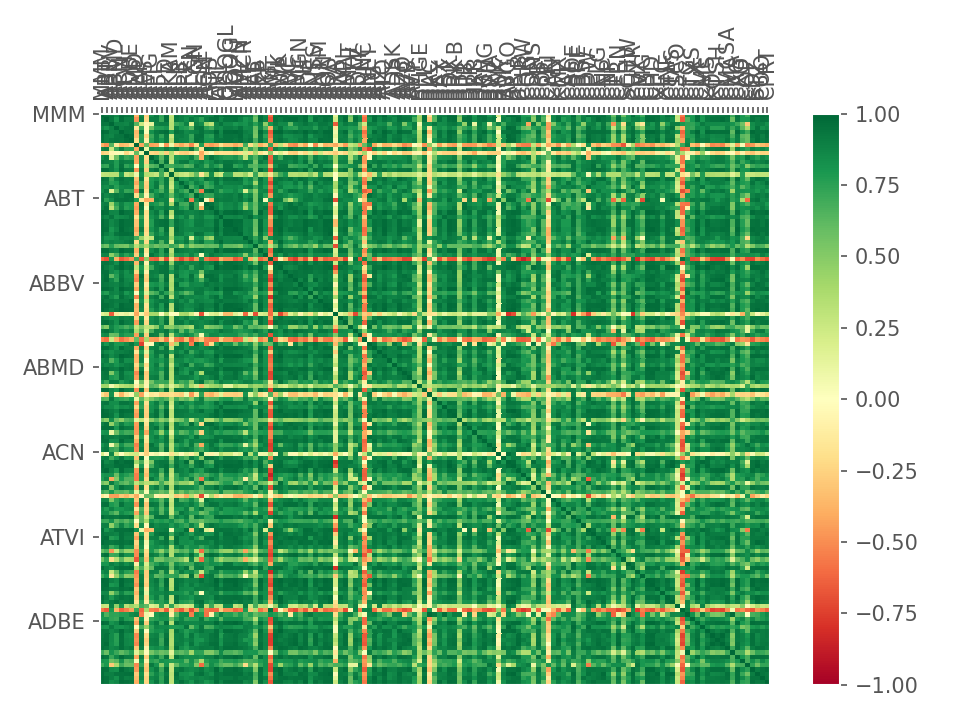

In [7]:
visualize_data()